In [47]:
import pandas as pd
import scipy as sc
import sklearn
import pickle as pc
import matplotlib.pyplot as mat
import numpy
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [48]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [50]:
df['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [51]:
df['compressionratio'].value_counts()

9.00     46
9.40     26
8.50     14
9.50     13
9.30     11
8.70      9
9.20      8
8.00      8
7.00      7
21.00     5
7.50      5
9.60      5
23.00     5
8.40      5
8.60      5
21.50     4
7.60      4
10.00     3
22.50     3
8.30      3
8.80      3
7.70      2
8.10      2
9.31      1
21.90     1
22.00     1
11.50     1
9.41      1
10.10     1
9.10      1
22.70     1
7.80      1
Name: compressionratio, dtype: int64

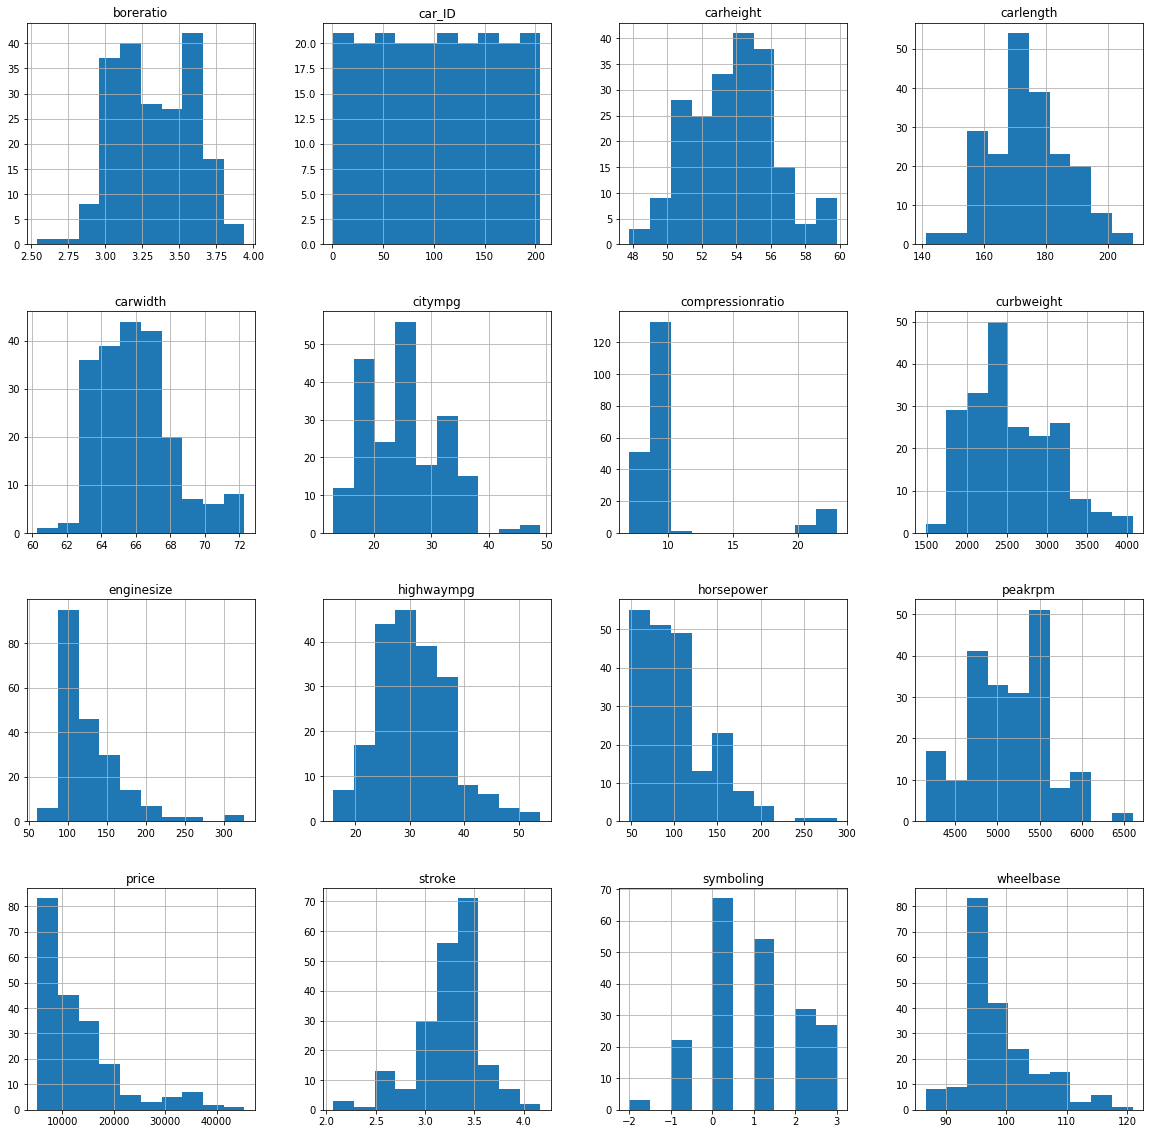

In [52]:
%matplotlib inline
df.hist(bins = 10, figsize = [20,20])
mat.show()

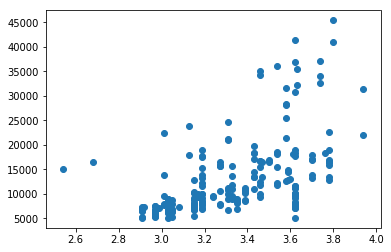

In [53]:
mat.scatter(df['boreratio'], df['price'])

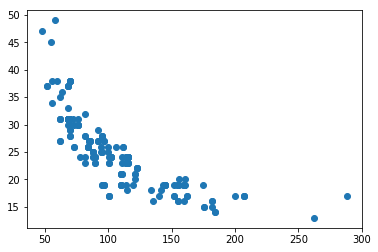

In [54]:
mat.scatter(df['horsepower'], df['citympg'])

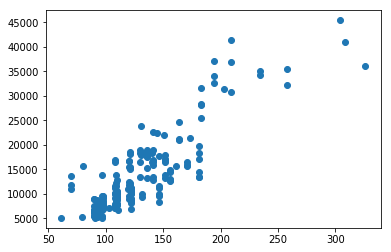

In [55]:
mat.scatter(df['enginesize'], df['price'])

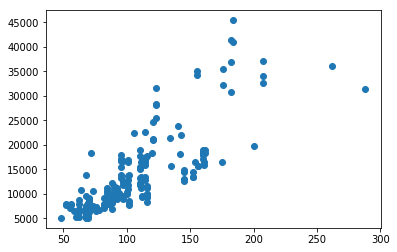

In [56]:
mat.scatter(df['horsepower'], df['price'])

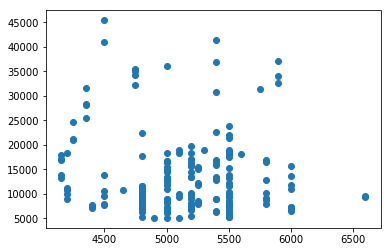

In [57]:
mat.scatter(df['peakrpm'], df['price'])

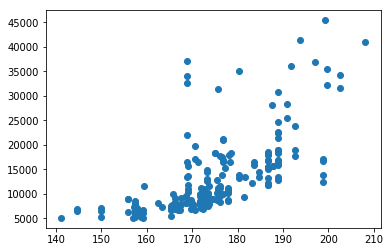

In [58]:
mat.scatter(df['carlength'], df['price'])

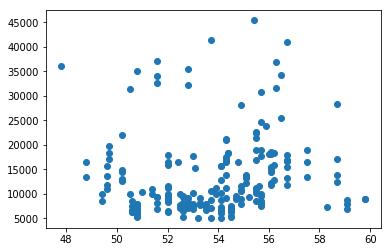

In [59]:
mat.scatter(df['carheight'], df['price'])

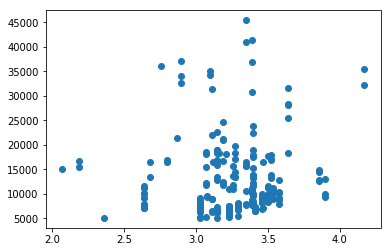

In [60]:
mat.scatter(df['stroke'], df['price'])

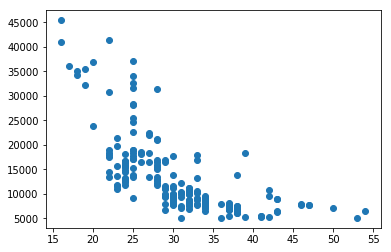

In [61]:
mat.scatter(df['highwaympg'], df['price'])

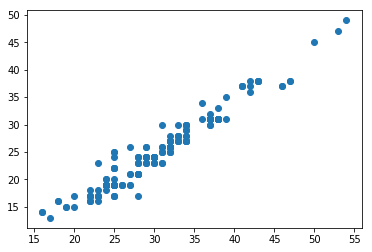

In [62]:
mat.scatter(df['highwaympg'], df['citympg'])

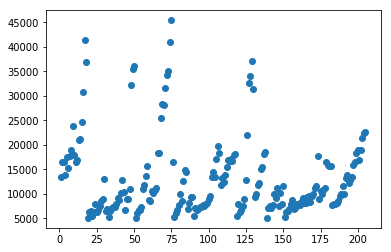

In [63]:
mat.scatter(df['car_ID'], df['price'])

In [64]:
corr_mat = df.corr()
corr_mat

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


In [65]:
df['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x112d9490>],
 'caps': [<matplotlib.lines.Line2D at 0x112d9a70>,
 'fliers': [<matplotlib.lines.Line2D at 0x112d9f90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x112d9f70>],
 'whiskers': [<matplotlib.lines.Line2D at 0x112d9450>,
  <matplotlib.lines.Line2D at 0x112d97f0>]}

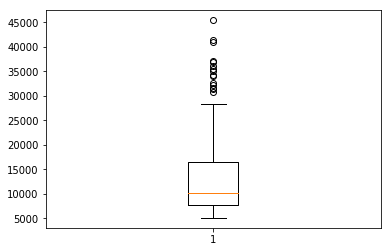

In [66]:
mat.boxplot(df['price'])

In [67]:
df[(numpy.abs(df['price']-df['price'].mean())>(3*df['price'].std()))]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
16,17,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0
73,74,0,buick century special,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0
74,75,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0


In [68]:
df[(numpy.abs(df['price']-df['price'].mean())<(3*df['price'].std()))]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.167


In [69]:
inlier=df[(numpy.abs(df['price']-df['price'].mean())<(3*df['price'].std()))]

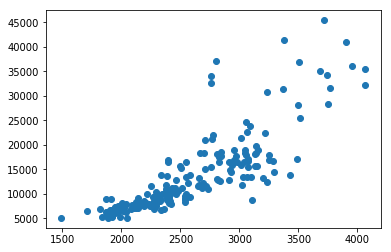

In [70]:
mat.scatter(df['curbweight'], df['price'])

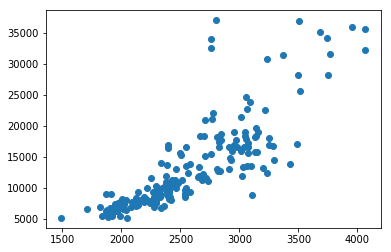

In [71]:
mat.scatter(inlier['curbweight'], inlier['price'])

In [72]:
car_cat = inlier[['CarName','fueltype','doornumber','aspiration','enginelocation','carbody','drivewheel','enginetype','cylindernumber','fuelsystem']]
category_attributes = pd.get_dummies(car_cat)

In [73]:
feature = inlier[['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','price']].join(category_attributes)
feature.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,2548,130,3.47,111,13495.0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,2548,130,3.47,111,16500.0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,2823,152,2.68,154,16500.0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,2337,109,3.19,102,13950.0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,2824,136,3.19,115,17450.0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [74]:
shuffled_indices = numpy.random.permutation(len(feature))


In [75]:
test_set_size = int(len(feature) * 0.1)
test_set_size

20

In [76]:
test_indices = shuffled_indices[:test_set_size]


In [77]:
train_indices = shuffled_indices[test_set_size:]

In [78]:
train = feature.iloc[train_indices]

In [79]:
test = feature.iloc[test_indices]
test.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
147,97.0,173.5,65.4,2455,108,3.62,94,10198.0,0,0,...,0,0,0,0,0,0,0,1,0,0
112,107.9,186.7,68.4,3252,152,3.70,95,16900.0,0,0,...,0,0,0,0,0,1,0,0,0,0
184,97.3,171.7,65.5,2264,97,3.01,52,7995.0,0,0,...,0,0,0,0,0,1,0,0,0,0
106,99.2,178.5,67.9,3139,181,3.43,160,18399.0,0,0,...,0,0,0,0,0,0,0,1,0,0
177,102.4,175.6,66.5,2458,122,3.31,92,11248.0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [80]:
lin_reg = LinearRegression()
lin_reg.fit(train.drop(['price'],axis=1),train['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [81]:
lin_reg.coef_

array([  7.69995755e+01,  -2.30948244e+02,   1.06286180e+03,
         1.41901489e+01,  -1.62771526e+01,  -2.92694210e+03,
        -2.04216588e+00,   1.14126326e+03,   1.27525936e-08,
        -1.42008987e+03,   1.58491013e+03,   3.53278635e+03,
        -8.66720954e+01,   2.02529267e+02,   1.03592731e+02,
        -2.78066054e+03,   4.27789940e+03,   6.66877724e+03,
         1.12809825e+04,   1.20931979e+04,   1.50512408e+04,
         9.57512088e+03,   2.11847693e+03,  -1.10176619e+03,
        -2.10148073e+03,  -2.14545250e+02,  -2.31430022e-08,
        -1.49698530e+03,   4.31671521e+03,   5.10500987e+02,
        -6.31981881e+02,   5.56774675e+02,  -1.41028972e+03,
        -2.32728972e+03,  -2.20665368e+03,  -2.57356609e+02,
        -1.13181671e+03,  -2.15711146e+03,  -1.69624886e+03,
         1.44154910e-09,   2.85118330e+03,   3.34639497e+02,
        -3.02861736e-10,   1.64842709e+03,  -1.08533856e+03,
         1.51471533e+03,   2.63298716e-10,   1.24555364e+03,
         1.28077666e+03,

In [82]:
lin_reg.intercept_

-39086.016646439726

In [83]:
prediction = lin_reg.predict(test.drop(['price'],axis=1))

In [84]:
mean_square = mean_squared_error(test['price'],prediction)
root_mean_square = numpy.sqrt(mean_square)
root_mean_square

2604.2976197693229

In [85]:
regressor_lasso = Lasso(random_state=0,alpha=71)
regressor_lasso.fit(train.drop(['price'],axis=1),train['price'])

Lasso(alpha=71, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False)

In [86]:
lasso_predict = regressor_lasso.predict(test.drop(['price'],axis=1))
mean_square = mean_squared_error(test['price'],lasso_predict)
root_mean_square = numpy.sqrt(mean_square)
root_mean_square

2307.3887041142284

In [87]:
regressor_ridge = Ridge(random_state=0,alpha=20)
regressor_ridge.fit(train.drop(['price'],axis=1),train['price'])

Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=0, solver='auto', tol=0.001)

In [88]:
ridge_predict = regressor_ridge.predict(test.drop(['price'],axis=1))
mean_square = mean_squared_error(test['price'],ridge_predict)
root_mean_square = numpy.sqrt(mean_square)
root_mean_square

2420.2661119546524

In [89]:
regressor_lasso.coef_

array([  6.37559115e+01,  -1.01744508e+02,   6.61346746e+02,
         3.85416385e+00,   4.83950062e+01,  -0.00000000e+00,
         3.82756178e+01,  -0.00000000e+00,   0.00000000e+00,
        -0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        -0.00000000e+00,   0.00000000e+00,  -0.00000000e+00,
        -0.00000000e+00,  -0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        -0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        -0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
        -0.00000000e+00,  -0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,  -0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,  -0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        -0.00000000e+00,

In [90]:
regressor_ridge.coef_

array([  5.77741884e+01,  -1.05209455e+02,   5.64196860e+02,
         3.64148165e+00,   5.15567749e+01,  -2.58100929e+02,
         5.42455837e+01,  -3.92446790e+01,   0.00000000e+00,
        -6.80869700e+00,   1.36286541e+02,   1.30306412e+02,
        -6.41321066e+00,   1.79999994e+02,   5.26791779e+01,
        -6.32404677e+01,   1.20255204e+01,   4.41605891e+02,
         1.21245642e+02,   4.61025935e+02,   2.18885004e+02,
         2.18469932e+02,   1.50144742e+02,   1.24754592e+02,
         4.83152089e+00,   2.64865153e+02,   0.00000000e+00,
         2.74483673e+02,   1.60109910e+02,   3.04541062e+01,
        -1.80547763e+01,   4.22824569e+01,   1.10524797e+01,
        -3.26141870e+01,  -6.65082364e+01,  -1.32944268e+02,
        -2.64170277e+01,  -7.57672134e+01,   6.93889074e+00,
         0.00000000e+00,   5.70008747e+01,  -3.07805265e+01,
         0.00000000e+00,   1.31663923e+02,  -3.61015977e+01,
         1.15504660e+01,   0.00000000e+00,  -3.90641702e+00,
        -3.36785639e+01,